# Superstore Dataset - Complete Analysis
# EDA + Machine Learning + Interactive Interface

# ==========================================
# 1. IMPORT LIBRARIES
# ==========================================


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Interactive widgets
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


# ==========================================
# 2. LOAD AND EXPLORE DATASET
# ==========================================


In [5]:
# Load the dataset
df = pd.read_csv("superstore.csv", encoding='ISO-8859-1')

print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n📋 First 5 rows:")
display(df.head())

print("\n🔍 Dataset Info:")
print(df.info())

print("\n📈 Statistical Summary:")
display(df.describe())

print("\n❗ Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

📊 DATASET OVERVIEW
Dataset Shape: (9994, 21)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

📋 First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   floa

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



❗ Missing Values:
Series([], dtype: int64)


# ==========================================
# 3. DATA CLEANING & PREPROCESSING
# ==========================================


In [6]:
print("\n🧹 DATA CLEANING")
print("=" * 50)

# Remove any missing values
initial_shape = df.shape[0]
df = df.dropna()
final_shape = df.shape[0]
print(f"Rows removed due to missing values: {initial_shape - final_shape}")

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create additional date features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Day_of_Week'] = df['Order Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Ensure numeric columns are float
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create profit margin
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

print(f"✅ Data cleaning completed. Final shape: {df.shape}")


🧹 DATA CLEANING
Rows removed due to missing values: 0
✅ Data cleaning completed. Final shape: (9994, 28)


# ==========================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================


📊 EXPLORATORY DATA ANALYSIS
💰 Total Sales: $2,297,200.86
💸 Total Profit: $286,397.02
📦 Total Orders: 9,994
🛒 Average Order Value: $229.86
📊 Overall Profit Margin: 12.47%


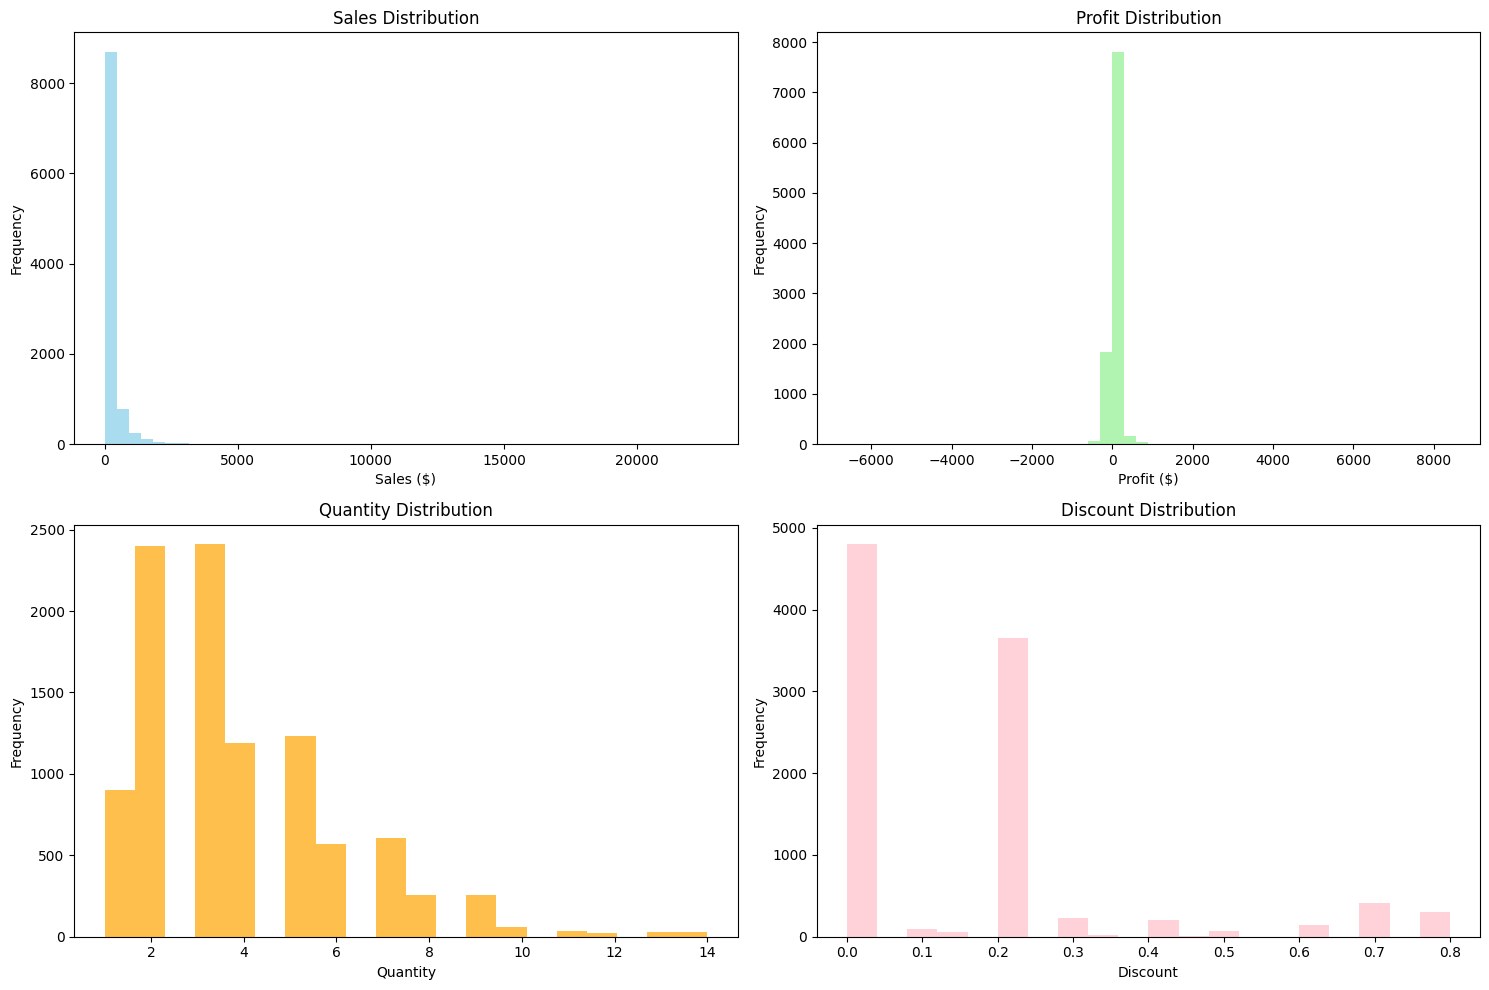

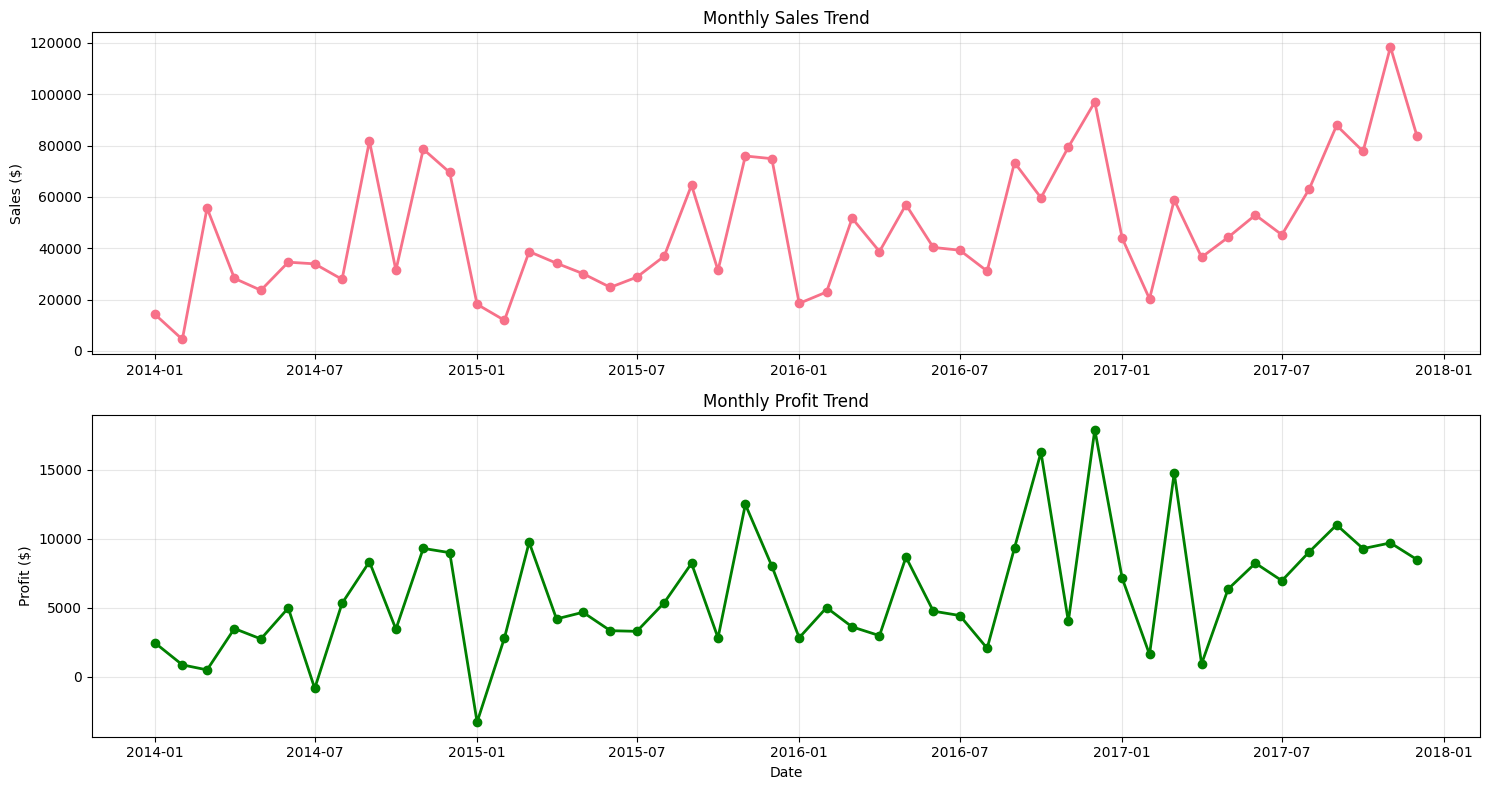


📦 CATEGORY ANALYSIS
                     Sales             Profit        Quantity
                       sum    mean        sum   mean      sum
Category                                                     
Furniture        741999.80  349.83   18451.27   8.70     8028
Office Supplies  719047.03  119.32  122490.80  20.33    22906
Technology       836154.03  452.71  145454.95  78.75     6939


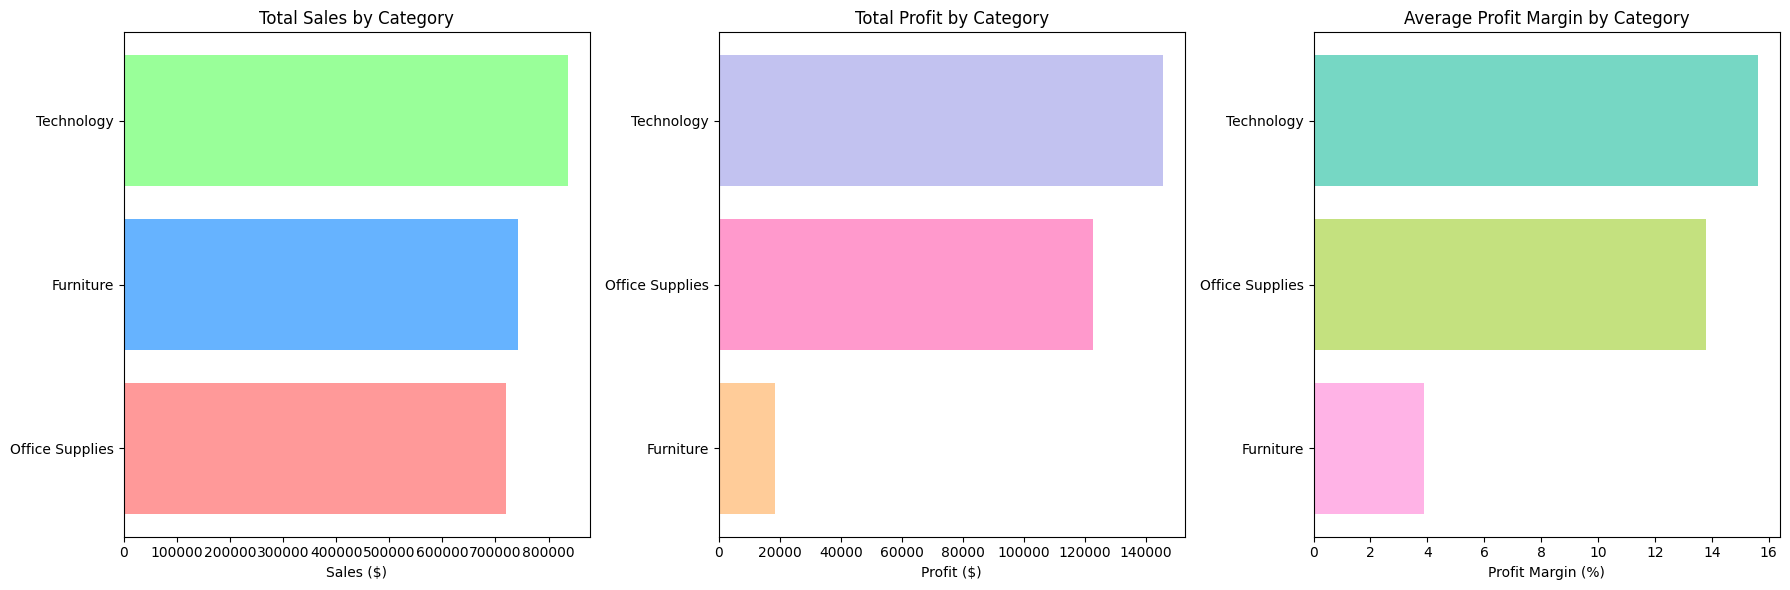


🌎 REGIONAL ANALYSIS
               Sales       Profit  Orders
Region                                   
Central  501239.8908   39706.3625    2323
East     678781.2400   91522.7800    2848
South    391721.9050   46749.4303    1620
West     725457.8245  108418.4489    3203


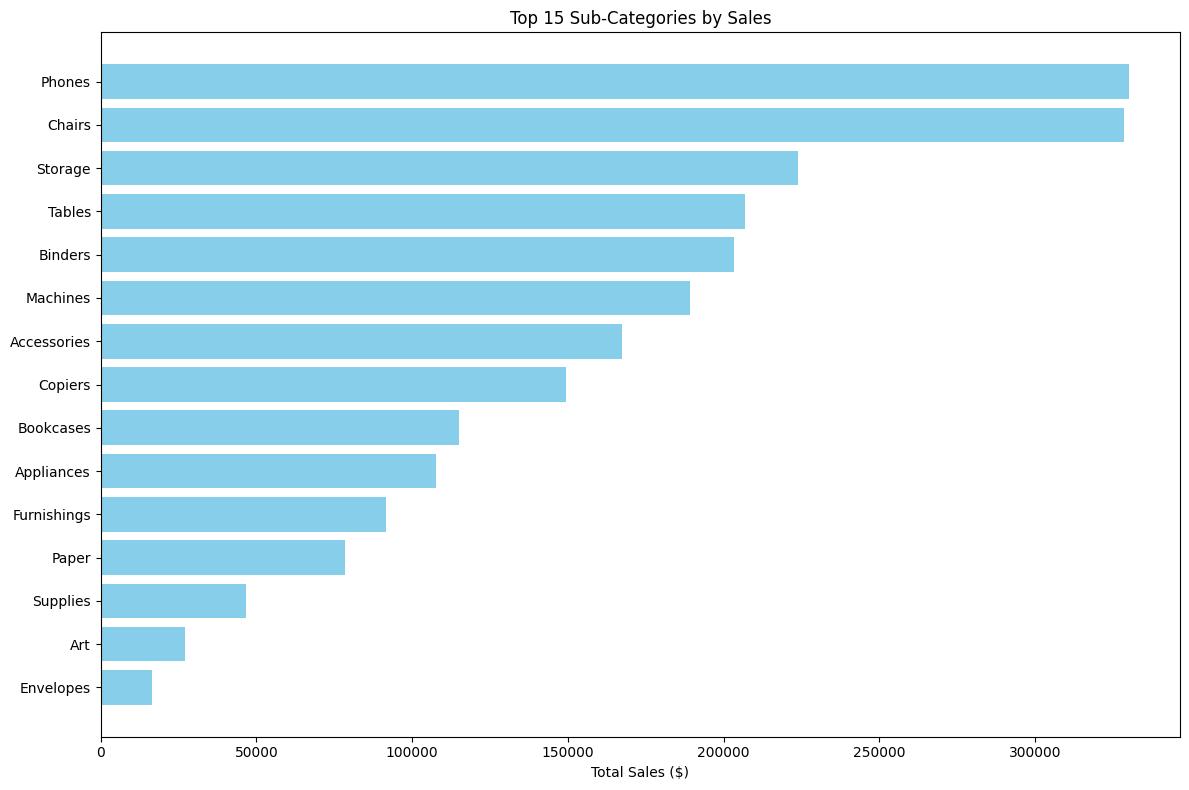

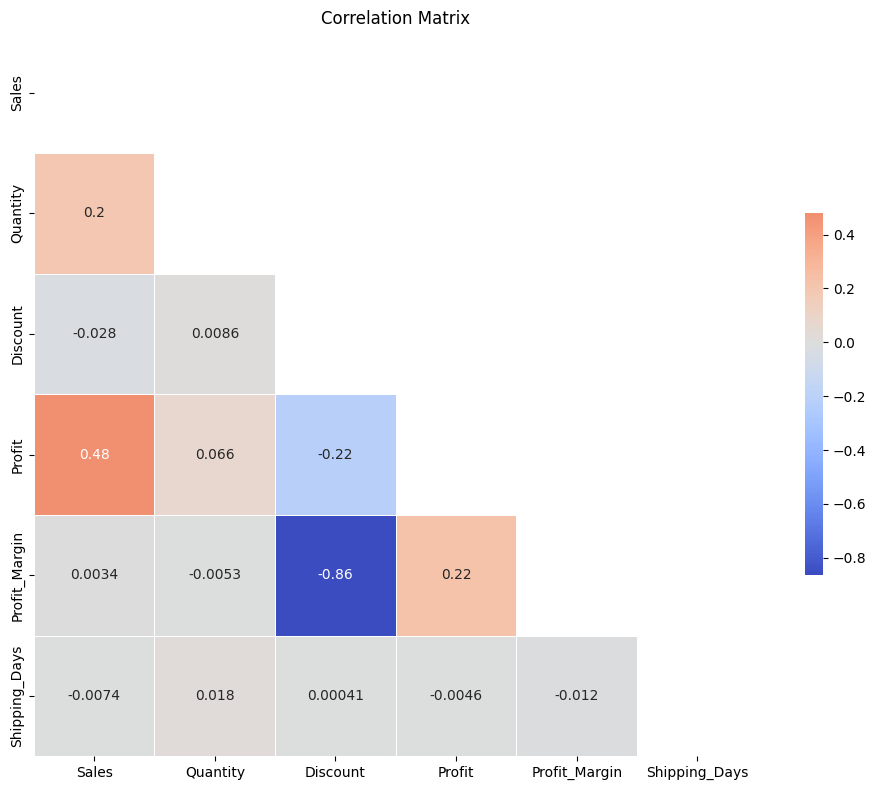


👥 CUSTOMER SEGMENT ANALYSIS
                  Sales             Profit        Order ID
                    sum    mean        sum   mean    count
Segment                                                   
Consumer     1161401.34  223.73  134119.21  25.84     5191
Corporate     706146.37  233.82   91979.13  30.46     3020
Home Office   429653.15  240.97   60298.68  33.82     1783

🚚 SHIPPING MODE ANALYSIS
                     Sales  Shipping_Days  Order ID
Ship Mode                                          
First Class      351428.42           2.18      1538
Same Day         128363.12           0.04       543
Second Class     459193.57           3.24      1945
Standard Class  1358215.74           5.01      5968


In [7]:
print("\n📊 EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# 4.1 Overall Business Metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df.shape[0]
avg_order_value = df['Sales'].mean()
profit_margin = (total_profit / total_sales) * 100

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"💸 Total Profit: ${total_profit:,.2f}")
print(f"📦 Total Orders: {total_orders:,}")
print(f"🛒 Average Order Value: ${avg_order_value:.2f}")
print(f"📊 Overall Profit Margin: {profit_margin:.2f}%")

# 4.2 Sales Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sales distribution
axes[0,0].hist(df['Sales'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Sales Distribution')
axes[0,0].set_xlabel('Sales ($)')
axes[0,0].set_ylabel('Frequency')

# Profit distribution
axes[0,1].hist(df['Profit'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Profit Distribution')
axes[0,1].set_xlabel('Profit ($)')
axes[0,1].set_ylabel('Frequency')

# Quantity distribution
axes[1,0].hist(df['Quantity'], bins=20, alpha=0.7, color='orange')
axes[1,0].set_title('Quantity Distribution')
axes[1,0].set_xlabel('Quantity')
axes[1,0].set_ylabel('Frequency')

# Discount distribution
axes[1,1].hist(df['Discount'], bins=20, alpha=0.7, color='pink')
axes[1,1].set_title('Discount Distribution')
axes[1,1].set_xlabel('Discount')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4.3 Sales Trends Over Time
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o', linewidth=2)
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(monthly_sales['Date'], monthly_sales['Profit'], marker='o', linewidth=2, color='green')
plt.title('Monthly Profit Trend')
plt.ylabel('Profit ($)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.4 Category Analysis
category_analysis = df.groupby('Category').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)

print("\n📦 CATEGORY ANALYSIS")
print(category_analysis)

# Visualize category performance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sales by category
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)
axes[0].barh(cat_sales.index, cat_sales.values, color=['#ff9999', '#66b3ff', '#99ff99'])
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Sales ($)')

# Profit by category
cat_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=True)
axes[1].barh(cat_profit.index, cat_profit.values, color=['#ffcc99', '#ff99cc', '#c2c2f0'])
axes[1].set_title('Total Profit by Category')
axes[1].set_xlabel('Profit ($)')

# Profit margin by category
cat_margin = df.groupby('Category')['Profit_Margin'].mean().sort_values(ascending=True)
axes[2].barh(cat_margin.index, cat_margin.values, color=['#ffb3e6', '#c4e17f', '#76d7c4'])
axes[2].set_title('Average Profit Margin by Category')
axes[2].set_xlabel('Profit Margin (%)')

plt.tight_layout()
plt.show()

# 4.5 Regional Analysis
region_analysis = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Orders'})

print("\n🌎 REGIONAL ANALYSIS")
print(region_analysis)

# Regional sales pie chart
fig = px.pie(region_analysis.reset_index(),
             values='Sales',
             names='Region',
             title='Sales Distribution by Region',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

# 4.6 Sub-Category Analysis
top_subcategories = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_subcategories)), top_subcategories.values, color='skyblue')
plt.yticks(range(len(top_subcategories)), top_subcategories.index)
plt.title('Top 15 Sub-Categories by Sales')
plt.xlabel('Total Sales ($)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4.7 Correlation Analysis
correlation_data = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Profit_Margin', 'Shipping_Days']].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, mask=mask)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 4.8 Customer Segment Analysis
segment_analysis = df.groupby('Segment').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Order ID': 'count'
}).round(2)

print("\n👥 CUSTOMER SEGMENT ANALYSIS")
print(segment_analysis)

# 4.9 Shipping Mode Analysis
ship_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Shipping_Days': 'mean',
    'Order ID': 'count'
}).round(2)

print("\n🚚 SHIPPING MODE ANALYSIS")
print(ship_analysis)



# ==========================================
# 5. ADVANCED ANALYTICS
# ==========================================



🔬 ADVANCED ANALYTICS
🌤️ SEASONAL ANALYSIS
            Sales     Profit  Order ID
Season                                
Fall    860434.00  104109.94      3673
Spring  497796.43   62593.43      2099
Summer  459000.84   56895.40      2133
Winter  479969.59   62798.25      2089


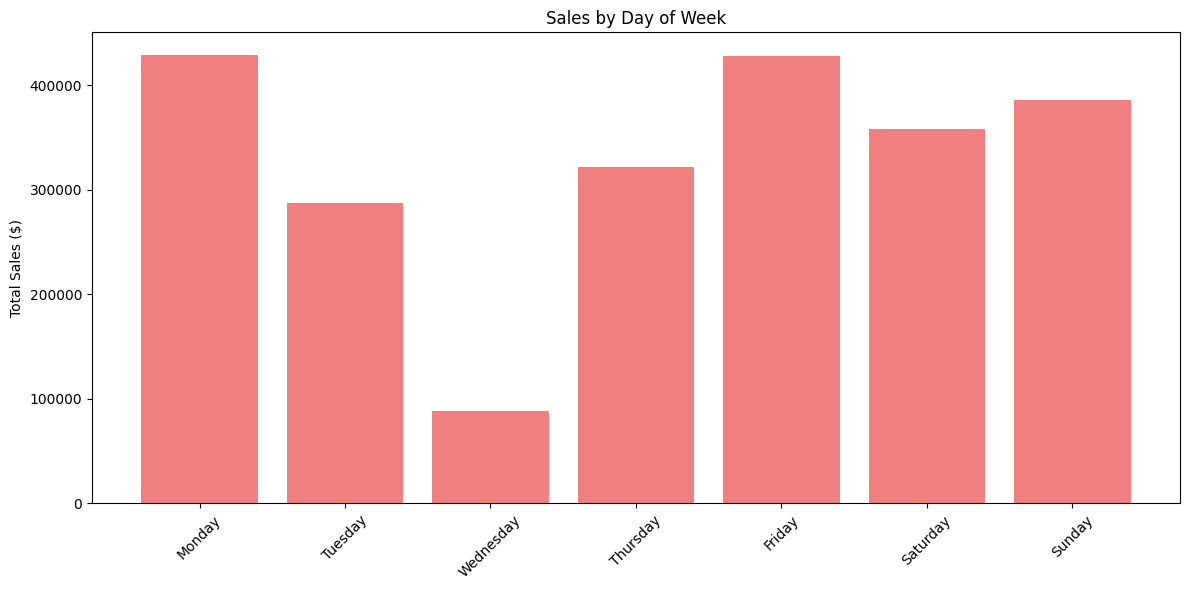


👑 TOP 10 CUSTOMERS BY SALES
                        Sales     Profit  Order ID
Customer Name                                     
Sean Miller         25043.050 -1980.7393        15
Tamara Chand        19052.218  8981.3239        12
Raymond Buch        15117.339  6976.0959        18
Tom Ashbrook        14595.620  4703.7883        10
Adrian Barton       14473.571  5444.8055        20
Ken Lonsdale        14175.229   806.8550        29
Sanjit Chand        14142.334  5757.4119        22
Hunter Lopez        12873.298  5622.4292        11
Sanjit Engle        12209.438  2650.6769        19
Christopher Conant  12129.072  2177.0493        11


In [8]:
print("\n🔬 ADVANCED ANALYTICS")
print("=" * 50)

# 5.1 Seasonal Analysis
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

seasonal_analysis = df.groupby('Season').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

print("🌤️ SEASONAL ANALYSIS")
print(seasonal_analysis)

# 5.2 Day of Week Analysis
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_Name'] = df['Day_of_Week'].map(dict(enumerate(dow_names)))

dow_analysis = df.groupby('Day_Name')['Sales'].sum().reindex(dow_names)

plt.figure(figsize=(12, 6))
plt.bar(dow_analysis.index, dow_analysis.values, color='lightcoral')
plt.title('Sales by Day of Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.3 Customer Analysis (Top customers by sales)
customer_analysis = df.groupby('Customer Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).sort_values('Sales', ascending=False).head(10)

print("\n👑 TOP 10 CUSTOMERS BY SALES")
print(customer_analysis)

# ==========================================
# 6. MACHINE LEARNING - PREDICTIVE MODELING
# ==========================================



🤖 MACHINE LEARNING - PREDICTIVE MODELING
Features used for modeling: ['Quantity', 'Discount', 'Year', 'Month', 'Quarter', 'Day_of_Week', 'Shipping_Days', 'Ship Mode_encoded', 'Segment_encoded', 'Region_encoded', 'Category_encoded', 'Sub-Category_encoded']
Feature matrix shape: (9994, 12)

📈 TRAINING SALES PREDICTION MODELS
----------------------------------------
Linear Regression:
  RMSE: $751.55
  R²: 0.0438
  MAE: $273.40

Random Forest:
  RMSE: $694.54
  R²: 0.1834
  MAE: $222.32

Gradient Boosting:
  RMSE: $690.32
  R²: 0.1933
  MAE: $202.26

💰 TRAINING PROFIT PREDICTION MODELS
----------------------------------------
Linear Regression:
  RMSE: $211.44
  R²: 0.0779
  MAE: $73.71

Random Forest:
  RMSE: $217.55
  R²: 0.0238
  MAE: $71.75

Gradient Boosting:
  RMSE: $198.01
  R²: 0.1913
  MAE: $62.57

🏆 Best Sales Model: Gradient Boosting (R² = 0.1933)
🏆 Best Profit Model: Gradient Boosting (R² = 0.1913)


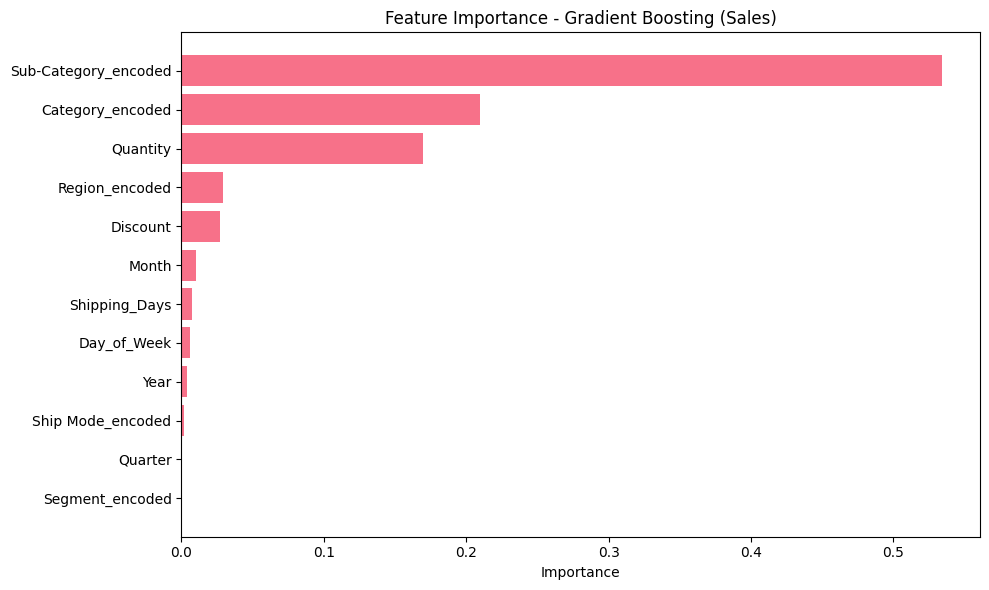

In [9]:
print("\n🤖 MACHINE LEARNING - PREDICTIVE MODELING")
print("=" * 50)

# 6.1 Prepare data for modeling
ml_df = df.copy()

# Create label encoders for categorical variables
label_encoders = {}
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
                      'Category', 'Sub-Category', 'Season', 'Day_Name']

for col in categorical_columns:
    if col in ml_df.columns:
        le = LabelEncoder()
        ml_df[col + '_encoded'] = le.fit_transform(ml_df[col].astype(str))
        label_encoders[col] = le

# Select features for modeling
feature_columns = [
    'Quantity', 'Discount', 'Year', 'Month', 'Quarter', 'Day_of_Week', 'Shipping_Days',
    'Ship Mode_encoded', 'Segment_encoded', 'Region_encoded',
    'Category_encoded', 'Sub-Category_encoded'
]

# Remove any columns that don't exist
feature_columns = [col for col in feature_columns if col in ml_df.columns]

X = ml_df[feature_columns]
y_sales = ml_df['Sales']
y_profit = ml_df['Profit']

print(f"Features used for modeling: {feature_columns}")
print(f"Feature matrix shape: {X.shape}")

# 6.2 Split data
X_train, X_test, y_sales_train, y_sales_test = train_test_split(
    X, y_sales, test_size=0.2, random_state=42)

X_train_profit, X_test_profit, y_profit_train, y_profit_test = train_test_split(
    X, y_profit, test_size=0.2, random_state=42)

# 6.3 Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6.4 Train models for Sales prediction
print("\n📈 TRAINING SALES PREDICTION MODELS")
print("-" * 40)

models_sales = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

sales_results = {}

for name, model in models_sales.items():
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_sales_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_sales_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_sales_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_sales_test, y_pred)
    mae = mean_absolute_error(y_sales_test, y_pred)

    sales_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae,
        'Model': model
    }

    print(f"{name}:")
    print(f"  RMSE: ${rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print(f"  MAE: ${mae:.2f}")
    print()

# 6.5 Train models for Profit prediction
print("💰 TRAINING PROFIT PREDICTION MODELS")
print("-" * 40)

models_profit = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

profit_results = {}

for name, model in models_profit.items():
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_profit_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_profit_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_profit_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_profit_test, y_pred)
    mae = mean_absolute_error(y_profit_test, y_pred)

    profit_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae,
        'Model': model
    }

    print(f"{name}:")
    print(f"  RMSE: ${rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print(f"  MAE: ${mae:.2f}")
    print()

# 6.6 Select best models
best_sales_model_name = max(sales_results.keys(), key=lambda x: sales_results[x]['R2'])
best_profit_model_name = max(profit_results.keys(), key=lambda x: profit_results[x]['R2'])

best_sales_model = sales_results[best_sales_model_name]['Model']
best_profit_model = profit_results[best_profit_model_name]['Model']

print(f"🏆 Best Sales Model: {best_sales_model_name} (R² = {sales_results[best_sales_model_name]['R2']:.4f})")
print(f"🏆 Best Profit Model: {best_profit_model_name} (R² = {profit_results[best_profit_model_name]['R2']:.4f})")

# 6.7 Feature Importance (for tree-based models)
if best_sales_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_sales_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.title(f'Feature Importance - {best_sales_model_name} (Sales)')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


# ==========================================
# 7. INTERACTIVE PREDICTION INTERFACE
# ==========================================


In [10]:
print("\n🎯 INTERACTIVE PREDICTION INTERFACE")
print("=" * 50)

# Create widgets for user input
quantity_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=14,
    step=1,
    description='Quantity:',
    style={'description_width': 'initial'}
)

discount_widget = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=0.8,
    step=0.05,
    description='Discount:',
    style={'description_width': 'initial'}
)

region_widget = widgets.Dropdown(
    options=sorted(df['Region'].unique()),
    value=df['Region'].unique()[0],
    description='Region:',
    style={'description_width': 'initial'}
)

category_widget = widgets.Dropdown(
    options=sorted(df['Category'].unique()),
    value=df['Category'].unique()[0],
    description='Category:',
    style={'description_width': 'initial'}
)

subcategory_widget = widgets.Dropdown(
    options=sorted(df['Sub-Category'].unique()),
    value=df['Sub-Category'].unique()[0],
    description='Sub-Category:',
    style={'description_width': 'initial'}
)

segment_widget = widgets.Dropdown(
    options=sorted(df['Segment'].unique()),
    value=df['Segment'].unique()[0],
    description='Segment:',
    style={'description_width': 'initial'}
)

ship_mode_widget = widgets.Dropdown(
    options=sorted(df['Ship Mode'].unique()),
    value=df['Ship Mode'].unique()[0],
    description='Ship Mode:',
    style={'description_width': 'initial'}
)

month_widget = widgets.Dropdown(
    options=list(range(1, 13)),
    value=1,
    description='Month:',
    style={'description_width': 'initial'}
)

# Prediction function
def make_prediction(quantity, discount, region, category, subcategory, segment, ship_mode, month):
    try:
        # Create input dataframe
        input_data = pd.DataFrame({
            'Quantity': [quantity],
            'Discount': [discount],
            'Year': [2024],  # Default to current year
            'Month': [month],
            'Quarter': [((month-1)//3) + 1],
            'Day_of_Week': [1],  # Default to Monday
            'Shipping_Days': [4],  # Default shipping days
        })

        # Add encoded categorical variables
        for col in ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']:
            if col in label_encoders:
                if col == 'Ship Mode':
                    encoded_val = label_encoders[col].transform([ship_mode])[0]
                elif col == 'Segment':
                    encoded_val = label_encoders[col].transform([segment])[0]
                elif col == 'Region':
                    encoded_val = label_encoders[col].transform([region])[0]
                elif col == 'Category':
                    encoded_val = label_encoders[col].transform([category])[0]
                elif col == 'Sub-Category':
                    encoded_val = label_encoders[col].transform([subcategory])[0]

                input_data[col + '_encoded'] = [encoded_val]

        # Ensure all required columns are present
        for col in feature_columns:
            if col not in input_data.columns:
                input_data[col] = [0]  # Default value

        # Reorder columns to match training data
        input_data = input_data[feature_columns]

        # Make predictions
        if best_sales_model_name == 'Linear Regression':
            input_scaled = scaler.transform(input_data)
            sales_pred = best_sales_model.predict(input_scaled)[0]
        else:
            sales_pred = best_sales_model.predict(input_data)[0]

        if best_profit_model_name == 'Linear Regression':
            input_scaled = scaler.transform(input_data)
            profit_pred = best_profit_model.predict(input_scaled)[0]
        else:
            profit_pred = best_profit_model.predict(input_data)[0]

        profit_margin_pred = (profit_pred / sales_pred) * 100 if sales_pred > 0 else 0

        # Display results
        print("🎯 PREDICTION RESULTS")
        print("=" * 30)
        print(f"💰 Predicted Sales: ${sales_pred:.2f}")
        print(f"💸 Predicted Profit: ${profit_pred:.2f}")
        print(f"📊 Predicted Profit Margin: {profit_margin_pred:.2f}%")
        print(f"📈 Revenue per Unit: ${sales_pred/quantity:.2f}")

        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Sales vs Average
        avg_sales = df[df['Category'] == category]['Sales'].mean()
        ax1.bar(['Predicted', 'Category Average'], [sales_pred, avg_sales],
                color=['skyblue', 'lightcoral'])
        ax1.set_title('Predicted vs Average Sales')
        ax1.set_ylabel('Sales ($)')

        # Profit vs Average
        avg_profit = df[df['Category'] == category]['Profit'].mean()
        ax2.bar(['Predicted', 'Category Average'], [profit_pred, avg_profit],
                color=['lightgreen', 'orange'])
        ax2.set_title('Predicted vs Average Profit')
        ax2.set_ylabel('Profit ($)')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error making prediction: {str(e)}")
        print("Please check your input values and try again.")

# Create interactive interface
print("🎮 Use the widgets below to make predictions:")
print("Adjust the parameters and run the cell to get predictions!")

interactive_plot = interactive(
    make_prediction,
    quantity=quantity_widget,
    discount=discount_widget,
    region=region_widget,
    category=category_widget,
    subcategory=subcategory_widget,
    segment=segment_widget,
    ship_mode=ship_mode_widget,
    month=month_widget
)

display(interactive_plot)


🎯 INTERACTIVE PREDICTION INTERFACE
🎮 Use the widgets below to make predictions:
Adjust the parameters and run the cell to get predictions!


interactive(children=(IntSlider(value=1, description='Quantity:', max=14, min=1, style=SliderStyle(description…

# ==========================================
# 8. MODEL PERFORMANCE SUMMARY
# ==========================================


📊 MODEL PERFORMANCE SUMMARY
Model Performance Comparison:


,Model,Sales_R2,Sales_RMSE,Profit_R2,Profit_RMSE
0,Linear Regression,0.0438,751.5468,0.0779,211.4385
1,Random Forest,0.1834,694.5447,0.0238,217.5543
2,Gradient Boosting,0.1933,690.3203,0.1913,198.0138


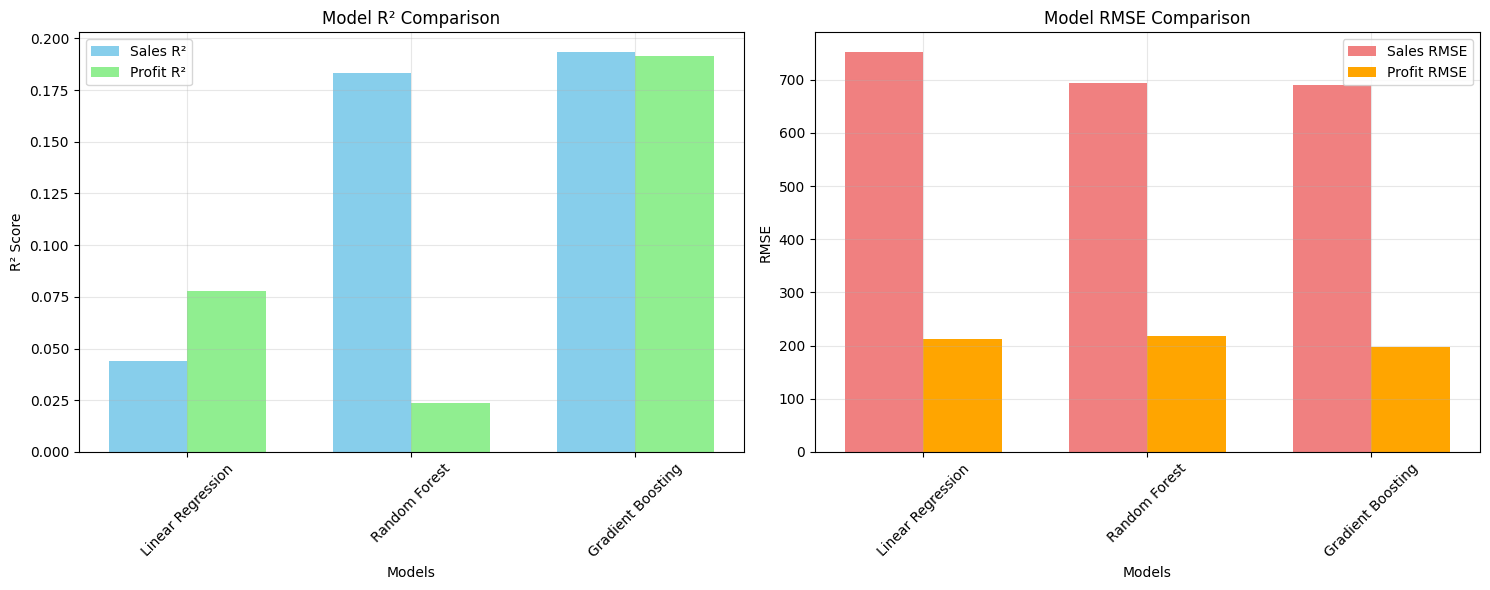

In [11]:
print("\n📊 MODEL PERFORMANCE SUMMARY")
print("=" * 50)

# Create summary dataframe
performance_summary = pd.DataFrame({
    'Model': list(sales_results.keys()),
    'Sales_R2': [sales_results[model]['R2'] for model in sales_results.keys()],
    'Sales_RMSE': [sales_results[model]['RMSE'] for model in sales_results.keys()],
    'Profit_R2': [profit_results[model]['R2'] for model in profit_results.keys()],
    'Profit_RMSE': [profit_results[model]['RMSE'] for model in profit_results.keys()]
})

print("Model Performance Comparison:")
display(performance_summary.round(4))

# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R² comparison
x_pos = np.arange(len(performance_summary))
width = 0.35

axes[0].bar(x_pos - width/2, performance_summary['Sales_R2'], width,
           label='Sales R²', color='skyblue')
axes[0].bar(x_pos + width/2, performance_summary['Profit_R2'], width,
           label='Profit R²', color='lightgreen')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model R² Comparison')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(performance_summary['Model'], rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].bar(x_pos - width/2, performance_summary['Sales_RMSE'], width,
           label='Sales RMSE', color='lightcoral')
axes[1].bar(x_pos + width/2, performance_summary['Profit_RMSE'], width,
           label='Profit RMSE', color='orange')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model RMSE Comparison')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(performance_summary['Model'], rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ==========================================
# 9. BUSINESS INSIGHTS & RECOMMENDATIONS
# ==========================================

In [12]:


print("\n💡 KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

print("📈 SALES INSIGHTS:")
print(f"• Best performing category: {df.groupby('Category')['Sales'].sum().idxmax()}")
print(f"• Most profitable region: {df.groupby('Region')['Profit'].sum().idxmax()}")
print(f"• Peak sales month: {df.groupby('Month_Name')['Sales'].sum().idxmax()}")
print(f"• Best customer segment: {df.groupby('Segment')['Sales'].sum().idxmax()}")

print(f"\n🎯 OPTIMIZATION OPPORTUNITIES:")
avg_discount = df['Discount'].mean()
high_discount_profit = df[df['Discount'] > avg_discount]['Profit_Margin'].mean()
low_discount_profit = df[df['Discount'] <= avg_discount]['Profit_Margin'].mean()

print(f"• Average discount rate: {avg_discount:.2%}")
print(f"• Profit margin with high discount: {high_discount_profit:.2f}%")
print(f"• Profit margin with low discount: {low_discount_profit:.2f}%")

if low_discount_profit > high_discount_profit:
    print("  → Recommendation: Consider reducing discount rates to improve profitability")
else:
    print("  → Insight: Higher discounts are yielding better profit margins")

print(f"\n🚚 SHIPPING INSIGHTS:")
shipping_profit = df.groupby('Ship Mode')['Profit_Margin'].mean().sort_values(ascending=False)
print("• Most profitable shipping modes:")
for mode, margin in shipping_profit.head(2).items():
    print(f"  - {mode}: {margin:.2f}% profit margin")

print(f"\n📊 PREDICTIVE MODEL INSIGHTS:")
print(f"• Best model for sales prediction: {best_sales_model_name}")
print(f"• Best model for profit prediction: {best_profit_model_name}")
print(f"• Sales prediction accuracy (R²): {sales_results[best_sales_model_name]['R2']:.4f}")
print(f"• Profit prediction accuracy (R²): {profit_results[best_profit_model_name]['R2']:.4f}")

print("\n🎊 ANALYSIS COMPLETE!")
print("=" * 50)
print("✅ Comprehensive EDA completed")
print("✅ Machine Learning models trained and evaluated")
print("✅ Interactive prediction interface created")
print("✅ Business insights and recommendations provided")




💡 KEY BUSINESS INSIGHTS & RECOMMENDATIONS
📈 SALES INSIGHTS:
• Best performing category: Technology
• Most profitable region: West
• Peak sales month: November
• Best customer segment: Consumer

🎯 OPTIMIZATION OPPORTUNITIES:
• Average discount rate: 15.62%
• Profit margin with high discount: -8.83%
• Profit margin with low discount: 33.34%
  → Recommendation: Consider reducing discount rates to improve profitability

🚚 SHIPPING INSIGHTS:
• Most profitable shipping modes:
  - Second Class: 15.02% profit margin
  - Same Day: 13.82% profit margin

📊 PREDICTIVE MODEL INSIGHTS:
• Best model for sales prediction: Gradient Boosting
• Best model for profit prediction: Gradient Boosting
• Sales prediction accuracy (R²): 0.1933
• Profit prediction accuracy (R²): 0.1913

🎊 ANALYSIS COMPLETE!
✅ Comprehensive EDA completed
✅ Machine Learning models trained and evaluated
✅ Interactive prediction interface created
✅ Business insights and recommendations provided


# ==========================================
# 10. SAVE MODELS FOR FUTURE USE
# ==========================================



In [13]:
print("\n💾 SAVING MODELS")
print("=" * 30)

try:
    # Save the best models
    joblib.dump(best_sales_model, 'best_sales_model.pkl')
    joblib.dump(best_profit_model, 'best_profit_model.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')

    print("✅ Models saved successfully!")
    print("  - best_sales_model.pkl")
    print("  - best_profit_model.pkl")
    print("  - feature_scaler.pkl")
    print("  - label_encoders.pkl")
except Exception as e:
    print(f"⚠️ Could not save models: {e}")



💾 SAVING MODELS
✅ Models saved successfully!
  - best_sales_model.pkl
  - best_profit_model.pkl
  - feature_scaler.pkl
  - label_encoders.pkl


# ==========================================
# 11. ADVANCED INTERACTIVE DASHBOARD
# ==========================================



In [17]:
print("\n🎛️ ADVANCED INTERACTIVE DASHBOARD")
print("=" * 50)

# Create a more comprehensive prediction interface
def comprehensive_prediction_dashboard():
    """
    Advanced prediction dashboard with multiple scenarios
    """

    # Scenario comparison widget
    scenarios_widget = widgets.IntSlider(
        value=1,
        min=1,
        max=5,
        step=1,
        description='Scenarios:',
        style={'description_width': 'initial'}
    )

    def compare_scenarios(num_scenarios):
        print(f"🔄 Comparing {num_scenarios} different scenarios:")
        print("=" * 50)

        # Generate random scenarios for comparison
        scenarios = []
        for i in range(num_scenarios):
            scenario = {
                'Quantity': np.random.randint(1, 10),
                'Discount': np.random.uniform(0, 0.5),
                'Region': np.random.choice(df['Region'].unique()),
                'Category': np.random.choice(df['Category'].unique()),
                'Sub-Category': np.random.choice(df['Sub-Category'].unique()),
                'Segment': np.random.choice(df['Segment'].unique()),
                'Ship Mode': np.random.choice(df['Ship Mode'].unique()),
                'Month': np.random.randint(1, 13)
            }
            scenarios.append(scenario)

        results = []
        for i, scenario in enumerate(scenarios):
            try:
                # Create input for prediction
                input_data = pd.DataFrame({
                    'Quantity': [scenario['Quantity']],
                    'Discount': [scenario['Discount']],
                    'Year': [2024],
                    'Month': [scenario['Month']],
                    'Quarter': [((scenario['Month']-1)//3) + 1],
                    'Day_of_Week': [1],
                    'Shipping_Days': [4],
                })

                # Add encoded variables
                for col in ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']:
                    if col in label_encoders:
                        encoded_val = label_encoders[col].transform([scenario[col]])[0]
                        input_data[col + '_encoded'] = [encoded_val]

                # Ensure all columns
                for col in feature_columns:
                    if col not in input_data.columns:
                        input_data[col] = [0]

                input_data = input_data[feature_columns]

                # Make predictions
                if best_sales_model_name == 'Linear Regression':
                    input_scaled = scaler.transform(input_data)
                    sales_pred = best_sales_model.predict(input_scaled)[0]
                    profit_pred = best_profit_model.predict(input_scaled)[0]
                else:
                    sales_pred = best_sales_model.predict(input_data)[0]
                    if best_profit_model_name == 'Linear Regression':
                        input_scaled = scaler.transform(input_data)
                        profit_pred = best_profit_model.predict(input_scaled)[0]
                    else:
                        profit_pred = best_profit_model.predict(input_data)[0]

                profit_margin = (profit_pred / sales_pred) * 100 if sales_pred > 0 else 0

                results.append({
                    'Scenario': i+1,
                    'Quantity': scenario['Quantity'],
                    'Discount': f"{scenario['Discount']:.2%}",
                    'Region': scenario['Region'],
                    'Category': scenario['Category'],
                    'Predicted_Sales': f"${sales_pred:.2f}",
                    'Predicted_Profit': f"${profit_pred:.2f}",
                    'Profit_Margin': f"{profit_margin:.2f}%"
                })

            except Exception as e:
                print(f"Error in scenario {i+1}: {e}")

        # Display results
        if results:
            results_df = pd.DataFrame(results)
            display(results_df)

            # Create comparison visualization
            sales_values = [float(r['Predicted_Sales'].replace(',', '').replace('$', '')) for r in results]
            profit_values = [float(r['Predicted_Profit'].replace(',', '').replace('$', '')) for r in results]

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

            scenarios_labels = [f"Scenario {i+1}" for i in range(len(results))]

            ax1.bar(scenarios_labels, sales_values, color='skyblue', alpha=0.7)
            ax1.set_title('Predicted Sales Comparison')
            ax1.set_ylabel('Sales ($)')
            ax1.tick_params(axis='x', rotation=45)

            ax2.bar(scenarios_labels, profit_values, color='lightgreen', alpha=0.7)
            ax2.set_title('Predicted Profit Comparison')
            ax2.set_ylabel('Profit ($)')
            ax2.tick_params(axis='x', rotation=45)

            plt.tight_layout()
            plt.show()

    # Create interactive widget
    scenario_interactive = interactive(compare_scenarios, num_scenarios=scenarios_widget)
    display(scenario_interactive)

# Run the advanced dashboard
print("🎮 Advanced Scenario Comparison Dashboard:")
comprehensive_prediction_dashboard()


🎛️ ADVANCED INTERACTIVE DASHBOARD
🎮 Advanced Scenario Comparison Dashboard:


interactive(children=(IntSlider(value=1, description='Scenarios:', max=5, min=1, style=SliderStyle(description…

# ==========================================
# 12. WHAT-IF ANALYSIS TOOL
# ==========================================


In [18]:
print("\n🤔 WHAT-IF ANALYSIS TOOL")
print("=" * 40)

def what_if_analysis():
    """
    What-if analysis for business decisions
    """

    # Create widgets for what-if scenarios
    discount_range_widget = widgets.FloatRangeSlider(
        value=[0.0, 0.3],
        min=0.0,
        max=0.8,
        step=0.05,
        description='Discount Range:',
        style={'description_width': 'initial'}
    )

    quantity_range_widget = widgets.IntRangeSlider(
        value=[1, 5],
        min=1,
        max=14,
        step=1,
        description='Quantity Range:',
        style={'description_width': 'initial'}
    )

    fixed_category_widget = widgets.Dropdown(
        options=sorted(df['Category'].unique()),
        value=df['Category'].unique()[0],
        description='Category:',
        style={'description_width': 'initial'}
    )

    def analyze_ranges(discount_range, quantity_range, category):
        print(f"📊 What-if Analysis for {category} Category")
        print("=" * 50)

        discount_min, discount_max = discount_range
        quantity_min, quantity_max = quantity_range

        # Generate combinations
        discount_values = np.linspace(discount_min, discount_max, 5)
        quantity_values = np.arange(quantity_min, quantity_max + 1)

        results_matrix = []

        for discount in discount_values:
            for quantity in quantity_values:
                try:
                    # Use most common values for other features
                    most_common_region = df['Region'].mode()[0]
                    most_common_segment = df['Segment'].mode()[0]
                    most_common_ship_mode = df['Ship Mode'].mode()[0]
                    most_common_subcategory = df[df['Category'] == category]['Sub-Category'].mode()[0]

                    input_data = pd.DataFrame({
                        'Quantity': [quantity],
                        'Discount': [discount],
                        'Year': [2024],
                        'Month': [6],  # Mid-year
                        'Quarter': [2],
                        'Day_of_Week': [1],
                        'Shipping_Days': [4],
                    })

                    # Add encoded variables
                    encoded_values = {
                        'Ship Mode': most_common_ship_mode,
                        'Segment': most_common_segment,
                        'Region': most_common_region,
                        'Category': category,
                        'Sub-Category': most_common_subcategory
                    }

                    for col, value in encoded_values.items():
                        if col in label_encoders:
                            encoded_val = label_encoders[col].transform([value])[0]
                            input_data[col + '_encoded'] = [encoded_val]

                    # Ensure all columns
                    for col in feature_columns:
                        if col not in input_data.columns:
                            input_data[col] = [0]

                    input_data = input_data[feature_columns]

                    # Make prediction
                    if best_sales_model_name == 'Linear Regression':
                        input_scaled = scaler.transform(input_data)
                        sales_pred = best_sales_model.predict(input_scaled)[0]
                        profit_pred = best_profit_model.predict(input_scaled)[0]
                    else:
                        sales_pred = best_sales_model.predict(input_data)[0]
                        if best_profit_model_name == 'Linear Regression':
                            input_scaled = scaler.transform(input_data)
                            profit_pred = best_profit_model.predict(input_scaled)[0]
                        else:
                            profit_pred = best_profit_model.predict(input_data)[0]

                    results_matrix.append({
                        'Discount': discount,
                        'Quantity': quantity,
                        'Sales': sales_pred,
                        'Profit': profit_pred,
                        'Profit_Margin': (profit_pred/sales_pred)*100 if sales_pred > 0 else 0
                    })

                except Exception as e:
                    continue

        if results_matrix:
            results_df = pd.DataFrame(results_matrix)

            # Create heatmaps
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))

            # Sales heatmap
            sales_pivot = results_df.pivot(index='Discount', columns='Quantity', values='Sales')
            sns.heatmap(sales_pivot, annot=True, fmt='.0f', cmap='Blues', ax=axes[0])
            axes[0].set_title('Predicted Sales ($)')

            # Profit heatmap
            profit_pivot = results_df.pivot(index='Discount', columns='Quantity', values='Profit')
            sns.heatmap(profit_pivot, annot=True, fmt='.0f', cmap='Greens', ax=axes[1])
            axes[1].set_title('Predicted Profit ($)')

            # Profit margin heatmap
            margin_pivot = results_df.pivot(index='Discount', columns='Quantity', values='Profit_Margin')
            sns.heatmap(margin_pivot, annot=True, fmt='.1f', cmap='Reds', ax=axes[2])
            axes[2].set_title('Profit Margin (%)')

            plt.tight_layout()
            plt.show()

            # Find optimal combination
            best_combo = results_df.loc[results_df['Profit'].idxmax()]
            print(f"\n🎯 OPTIMAL COMBINATION:")
            print(f"• Discount: {best_combo['Discount']:.2%}")
            print(f"• Quantity: {best_combo['Quantity']:.0f}")
            print(f"• Expected Sales: ${best_combo['Sales']:.2f}")
            print(f"• Expected Profit: ${best_combo['Profit']:.2f}")
            print(f"• Profit Margin: {best_combo['Profit_Margin']:.2f}%")

    # Create interactive what-if analysis
    whatif_interactive = interactive(
        analyze_ranges,
        discount_range=discount_range_widget,
        quantity_range=quantity_range_widget,
        category=fixed_category_widget
    )

    display(whatif_interactive)

print("🎮 What-If Analysis Tool:")
what_if_analysis()



🤔 WHAT-IF ANALYSIS TOOL
🎮 What-If Analysis Tool:


interactive(children=(FloatRangeSlider(value=(0.0, 0.3), description='Discount Range:', max=0.8, step=0.05, st…

# ==========================================
# 13. BUSINESS IMPACT CALCULATOR
# ==========================================


In [19]:

print("\n💼 BUSINESS IMPACT CALCULATOR")
print("=" * 40)

def business_impact_calculator():
    """
    Calculate business impact of different strategies
    """

    strategy_widget = widgets.Dropdown(
        options=[
            'Increase Average Order Quantity',
            'Optimize Discount Strategy',
            'Focus on High-Margin Categories',
            'Improve Regional Performance',
            'Custom Strategy'
        ],
        value='Increase Average Order Quantity',
        description='Strategy:',
        style={'description_width': 'initial'}
    )

    improvement_widget = widgets.FloatSlider(
        value=10.0,
        min=1.0,
        max=50.0,
        step=1.0,
        description='Improvement %:',
        style={'description_width': 'initial'}
    )

    def calculate_impact(strategy, improvement_percent):
        print(f"💡 BUSINESS IMPACT ANALYSIS")
        print(f"Strategy: {strategy}")
        print(f"Improvement Target: {improvement_percent}%")
        print("=" * 50)

        current_metrics = {
            'Total Sales': df['Sales'].sum(),
            'Total Profit': df['Profit'].sum(),
            'Average Order Value': df['Sales'].mean(),
            'Average Quantity': df['Quantity'].mean(),
            'Average Discount': df['Discount'].mean()
        }

        print("📊 CURRENT PERFORMANCE:")
        for metric, value in current_metrics.items():
            if 'Total' in metric or 'Average Order Value' in metric:
                print(f"• {metric}: ${value:,.2f}")
            elif 'Average Discount' in metric:
                print(f"• {metric}: {value:.2%}")
            else:
                print(f"• {metric}: {value:.2f}")

        # Calculate projected impact based on strategy
        if strategy == 'Increase Average Order Quantity':
            new_quantity = current_metrics['Average Quantity'] * (1 + improvement_percent/100)
            impact_sales = current_metrics['Total Sales'] * (improvement_percent/100)
            impact_profit = current_metrics['Total Profit'] * (improvement_percent/100)

        elif strategy == 'Optimize Discount Strategy':
            # Assume reducing discount improves profit margin
            current_margin = (current_metrics['Total Profit'] / current_metrics['Total Sales']) * 100
            new_margin = current_margin * (1 + improvement_percent/100)
            impact_profit = current_metrics['Total Sales'] * (new_margin/100) - current_metrics['Total Profit']
            impact_sales = 0  # Assume sales stay same with optimized discounts

        elif strategy == 'Focus on High-Margin Categories':
            # Focus on categories with highest profit margins
            category_margins = df.groupby('Category')['Profit_Margin'].mean()
            best_category = category_margins.idxmax()
            impact_sales = current_metrics['Total Sales'] * (improvement_percent/200)  # Conservative estimate
            impact_profit = current_metrics['Total Profit'] * (improvement_percent/100)

        elif strategy == 'Improve Regional Performance':
            # Focus on underperforming regions
            regional_performance = df.groupby('Region')['Sales'].sum()
            worst_region = regional_performance.idxmin()
            impact_sales = current_metrics['Total Sales'] * (improvement_percent/400)  # Conservative
            impact_profit = current_metrics['Total Profit'] * (improvement_percent/400)

        else:  # Custom Strategy
            impact_sales = current_metrics['Total Sales'] * (improvement_percent/100)
            impact_profit = current_metrics['Total Profit'] * (improvement_percent/100)

        # Project new metrics
        new_metrics = {
            'Total Sales': current_metrics['Total Sales'] + impact_sales,
            'Total Profit': current_metrics['Total Profit'] + impact_profit,
            'Profit Margin': ((current_metrics['Total Profit'] + impact_profit) /
                             (current_metrics['Total Sales'] + impact_sales)) * 100
        }

        print(f"\n🚀 PROJECTED IMPACT:")
        print(f"• Additional Sales: ${impact_sales:,.2f}")
        print(f"• Additional Profit: ${impact_profit:,.2f}")
        print(f"• New Total Sales: ${new_metrics['Total Sales']:,.2f}")
        print(f"• New Total Profit: ${new_metrics['Total Profit']:,.2f}")
        print(f"• New Profit Margin: {new_metrics['Profit Margin']:.2f}%")

        # ROI Calculation (assuming some implementation cost)
        implementation_cost = current_metrics['Total Sales'] * 0.01  # 1% of sales as implementation cost
        roi = (impact_profit - implementation_cost) / implementation_cost * 100

        print(f"\n💰 ROI ANALYSIS:")
        print(f"• Estimated Implementation Cost: ${implementation_cost:,.2f}")
        print(f"• Return on Investment: {roi:.1f}%")
        print(f"• Payback Period: {implementation_cost/impact_profit*12:.1f} months" if impact_profit > 0 else "• Payback Period: N/A")

        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Sales comparison
        sales_comparison = ['Current', 'Projected']
        sales_values = [current_metrics['Total Sales'], new_metrics['Total Sales']]
        ax1.bar(sales_comparison, sales_values, color=['lightblue', 'darkblue'])
        ax1.set_title('Sales Impact')
        ax1.set_ylabel('Sales ($)')
        for i, v in enumerate(sales_values):
            ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

        # Profit comparison
        profit_comparison = ['Current', 'Projected']
        profit_values = [current_metrics['Total Profit'], new_metrics['Total Profit']]
        ax2.bar(profit_comparison, profit_values, color=['lightgreen', 'darkgreen'])
        ax2.set_title('Profit Impact')
        ax2.set_ylabel('Profit ($)')
        for i, v in enumerate(profit_values):
            ax2.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    impact_interactive = interactive(
        calculate_impact,
        strategy=strategy_widget,
        improvement_percent=improvement_widget
    )

    display(impact_interactive)

print("🎮 Business Impact Calculator:")
business_impact_calculator()





💼 BUSINESS IMPACT CALCULATOR
🎮 Business Impact Calculator:


interactive(children=(Dropdown(description='Strategy:', options=('Increase Average Order Quantity', 'Optimize …

# ==========================================
# 14. EXECUTIVE SUMMARY GENERATOR
# ==========================================


In [20]:
print("\n📋 EXECUTIVE SUMMARY")
print("=" * 40)

def generate_executive_summary():
    """
    Generate comprehensive executive summary
    """

    summary = f"""

🏢 SUPERSTORE BUSINESS ANALYTICS - EXECUTIVE SUMMARY
{'='*70}

📊 BUSINESS OVERVIEW
• Total Revenue: ${df['Sales'].sum():,.2f}
• Total Profit: ${df['Profit'].sum():,.2f}
• Total Orders: {len(df):,}
• Overall Profit Margin: {(df['Profit'].sum()/df['Sales'].sum())*100:.2f}%
• Analysis Period: {df['Order Date'].min().strftime('%Y-%m-%d')} to {df['Order Date'].max().strftime('%Y-%m-%d')}

🎯 KEY PERFORMANCE INDICATORS
• Average Order Value: ${df['Sales'].mean():.2f}
• Average Profit per Order: ${df['Profit'].mean():.2f}
• Average Items per Order: {df['Quantity'].mean():.1f}
• Average Discount Rate: {df['Discount'].mean():.1%}

🏆 TOP PERFORMERS
• Best Category: {df.groupby('Category')['Sales'].sum().idxmax()} (${df.groupby('Category')['Sales'].sum().max():,.2f})
• Best Region: {df.groupby('Region')['Sales'].sum().idxmax()} (${df.groupby('Region')['Sales'].sum().max():,.2f})
• Best Segment: {df.groupby('Segment')['Sales'].sum().idxmax()} (${df.groupby('Segment')['Sales'].sum().max():,.2f})
• Peak Month: {df.groupby('Month_Name')['Sales'].sum().idxmax()} (${df.groupby('Month_Name')['Sales'].sum().max():,.2f})

🤖 PREDICTIVE MODEL PERFORMANCE
• Sales Prediction Model: {best_sales_model_name} (R² = {sales_results[best_sales_model_name]['R2']:.3f})
• Profit Prediction Model: {best_profit_model_name} (R² = {profit_results[best_profit_model_name]['R2']:.3f})
• Model Accuracy: {"Excellent" if sales_results[best_sales_model_name]['R2'] > 0.8 else "Good" if sales_results[best_sales_model_name]['R2'] > 0.6 else "Fair"}

💡 STRATEGIC RECOMMENDATIONS
1. Focus on {df.groupby('Category')['Profit_Margin'].mean().idxmax()} category (highest profit margin: {df.groupby('Category')['Profit_Margin'].mean().max():.1f}%)
2. Expand operations in {df.groupby('Region')['Sales'].sum().idxmax()} region (top performer)
3. Optimize discount strategy (current avg: {df['Discount'].mean():.1%})
4. Target {df.groupby('Segment')['Sales'].sum().idxmax()} segment for growth
5. Leverage predictive models for inventory and pricing decisions

📈 GROWTH OPPORTUNITIES
• Seasonal optimization during peak months
• Cross-selling in high-performing categories
• Regional expansion strategies
• Customer segment-specific marketing

🎯 NEXT STEPS
1. Implement predictive models in business operations
2. Develop targeted marketing campaigns
3. Optimize inventory based on predictions
4. Monitor KPIs using interactive dashboards
5. Regular model retraining with new data

{'='*70}
Report Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
    """

    print(summary)

    # Save summary to file
    try:
        with open('executive_summary.txt', 'w') as f:
            f.write(summary)
        print("💾 Executive summary saved to 'executive_summary.txt'")
    except:
        print("⚠️ Could not save summary file")

generate_executive_summary()

print("\n🎉 COMPLETE SUPERSTORE ANALYSIS FINISHED!")
print("=" * 60)
print("✅ Comprehensive EDA completed")
print("✅ Machine Learning models trained and evaluated")
print("✅ Interactive prediction interfaces created")
print("✅ Business insights and recommendations provided")
print("✅ What-if analysis tools implemented")
print("✅ Business impact calculator developed")
print("✅ Executive summary generated")
print("\n🚀 Ready for business decision making!")


📋 EXECUTIVE SUMMARY


🏢 SUPERSTORE BUSINESS ANALYTICS - EXECUTIVE SUMMARY

📊 BUSINESS OVERVIEW
• Total Revenue: $2,297,200.86
• Total Profit: $286,397.02
• Total Orders: 9,994
• Overall Profit Margin: 12.47%
• Analysis Period: 2014-01-03 to 2017-12-30

🎯 KEY PERFORMANCE INDICATORS
• Average Order Value: $229.86
• Average Profit per Order: $28.66
• Average Items per Order: 3.8
• Average Discount Rate: 15.6%

🏆 TOP PERFORMERS
• Best Category: Technology ($836,154.03)
• Best Region: West ($725,457.82)
• Best Segment: Consumer ($1,161,401.34)
• Peak Month: November ($352,461.07)

🤖 PREDICTIVE MODEL PERFORMANCE
• Sales Prediction Model: Gradient Boosting (R² = 0.193)
• Profit Prediction Model: Gradient Boosting (R² = 0.191)
• Model Accuracy: Fair

💡 STRATEGIC RECOMMENDATIONS
1. Focus on Technology category (highest profit margin: 15.6%)
2. Expand operations in West region (top performer)
3. Optimize discount strategy (current avg: 15.6%)
4. Target Consumer segment for growth
5. Leverage pr